# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Problem Definition

The task is to develop predictive models and perform exploratory data analysis (EDA) to identify the key drivers of used car prices. This involves converting the business problem into a data problem by leveraging statistical techniques and machine learning algorithms to analyze the dataset. Key steps include feature engineering to extract meaningful variables, data cleaning to handle missing or inconsistent values, and model training to predict car prices based on features such as manufacturing year, condition, mileage, manufacturer, model, region, fuel type, and transmission. The goal is to quantify the influence of these factors and provide actionable insights for pricing strategy optimization.

### Objectives

The primary goal of this analysis is to identify and understand the key factors that influence the price of used cars. By analyzing the dataset containing information on 426,000 used cars, we aim to provide actionable insights and recommendations that will help the dealership optimize its operations and better meet consumer demands.

### Business Questions

To achieve this objective, the following key business questions need to be addressed:

- Which factors have the most significant impact on the price of a used car?
- How does the car's age (year) affect its price?
- What role does the manufacturer and model play in the car's price?
- How do different conditions (e.g., mileage, condition, fuel type) influence the price?
- Are there regional variations in car prices, and what are the reasons for these variations?
- What transmission types are more valuable in the used car market?
- Does the title status (e.g., clean, salvage) significantly affect the price?
- How does the car's size and type (e.g., SUV, sedan) affect its price?
- What impact does the car's color have on its price?

### Dataset Overview

The dataset from "Kaggle.com" contains the following columns:

- id: Unique identifier for each car listing.
- region: Geographic region where the car is being sold.
- price: Listing price of the car.
- year: Manufacturing year of the car.
- manufacturer: Car manufacturer (e.g., Ford, Toyota).
- model: Specific model of the car.
- condition: Condition of the car (e.g., new, like new, excellent).
- cylinders: Number of cylinders in the car’s engine.
- fuel: Type of fuel used (e.g., gasoline, diesel).
- odometer: Mileage of the car.
- title_status: Legal status of the car's title (e.g., clean, salvage).
- transmission: Type of transmission (e.g., automatic, manual).
- VIN: Vehicle Identification Number.
- drive: Type of drivetrain (e.g., 4wd, fwd).
- size: Size category of the car (e.g., compact, full-size).
- type: Type of car (e.g., SUV, sedan).
- paint_color: Color of the car.
- state: State where the car is being sold.


The colomn **price** contains the target variable. 

In [144]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



warnings.filterwarnings("ignore")

In [86]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')


# Display the first few rows of the dataset
df.head(-5)

id                  region  price    year   manufacturer  \
0       7222695916                prescott   6000     NaN            NaN   
1       7218891961            fayetteville  11900     NaN            NaN   
2       7221797935            florida keys  21000     NaN            NaN   
3       7222270760  worcester / central MA   1500     NaN            NaN   
4       7210384030              greensboro   4900     NaN            NaN   
...            ...                     ...    ...     ...            ...   
426870  7301592119                 wyoming  22990  2020.0        hyundai   
426871  7301591639                 wyoming  17990  2018.0            kia   
426872  7301591201                 wyoming  32590  2020.0  mercedes-benz   
426873  7301591202                 wyoming  30990  2018.0  mercedes-benz   
426874  7301591199                 wyoming  33590  2018.0          lexus   

                               model condition    cylinders fuel  odometer  \
0                                NaN       NaN          NaN  NaN       NaN   
1                                NaN       NaN          NaN  NaN       NaN   
2                                NaN       NaN          NaN  NaN       NaN   
3                                NaN       NaN          NaN  NaN       NaN   
4                                NaN       NaN          NaN  NaN       NaN   
...                              ...       ...          ...  ...       ...   
426870            sonata se sedan 4d      good          NaN  gas    3066.0   
426871  sportage lx sport utility 4d      good          NaN  gas   34239.0   
426872                 c-class c 300      good          NaN  gas   19059.0   
426873                 glc 300 sport      good          NaN  gas   15080.0   
426874               gs 350 sedan 4d      good  6 cylinders  gas   30814.0   

       title_status transmission                VIN drive size   type  \
0               NaN          NaN                NaN   NaN  NaN    NaN   
1               NaN          NaN                NaN   NaN  NaN    NaN   
2               NaN          NaN                NaN   NaN  NaN    NaN   
3               NaN          NaN                NaN   NaN  NaN    NaN   
4               NaN          NaN                NaN   NaN  NaN    NaN   
...             ...          ...                ...   ...  ...    ...   
426870        clean        other  5NPEG4JAXLH051710   fwd  NaN  sedan   
426871        clean        other  KNDPMCAC7J7417329   NaN  NaN    SUV   
426872        clean        other  55SWF8DB6LU325050   rwd  NaN  sedan   
426873        clean    automatic  WDC0G4JB6JV019749   rwd  NaN  other   
426874        clean    automatic  JTHBZ1BLXJA012999   rwd  NaN  sedan   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426870        blue    wy  
426871         NaN    wy  
426872       white    wy  
426873       white    wy  
426874       white    wy  

[426875 rows x 18 columns]

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

- Loading the Dataset: The dataset is loaded into a DataFrame from a CSV file.
- Basic Information and Summary Statistics: Display basic information and summary statistics of the dataset to understand its structure and key characteristics.
- Missing Values Check: Identify missing values in the dataset.
- Dropping Missing Prices: Rows with missing 'price' values are dropped since 'price' is the target variable.
- Distribution of Prices: Visualize the distribution of car prices using a histogram.
- Correlation Matrix: Visualize correlations between numerical variables to identify potential relationships.
- Price Variation by Manufacturer and Condition: Use box plots to visualize how car prices vary by manufacturer and condition.
- Price vs. Odometer: Use a scatter plot to explore the relationship between the car's odometer reading and its price.
- Average Price by Region: Calculate and display the average car price per region.

In [87]:
# Basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-n

In [88]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [89]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


### Eliminating Columns from the Model
Given the dataset, several columns have significant amounts of missing values, making them less reliable and potentially detrimental to model performance if included without proper handling. To enhance the model's robustness and processing efficiency, the following columns were eliminated:

- size: Contains 306,361 missing values. With such a high number of missing entries, the column is unlikely to provide reliable information.
- cylinders: Contains 177,678 missing values. The vast amount of missing data makes it difficult to accurately capture the feature's impact on car prices.
- VIN: Contains 161,042 missing values. This unique identifier is not useful for price prediction and has substantial missing data.
- paint_color: Contains 130,203 missing values. The missing data and potential variability make it less useful for the model.
- condition: Contains 174,104 missing values. The high number of missing entries reduces the reliability of this feature.
- id: Contains 0 missing values but is a unique identifier for each record, offering no predictive value.
- drive: Contains 130,567 missing values. The substantial missing data impacts its reliability.
- type: Contains 92,858 missing values. The missing data and high cardinality make it less useful for the model.

In [90]:
print(max(df['price']))

3736928711


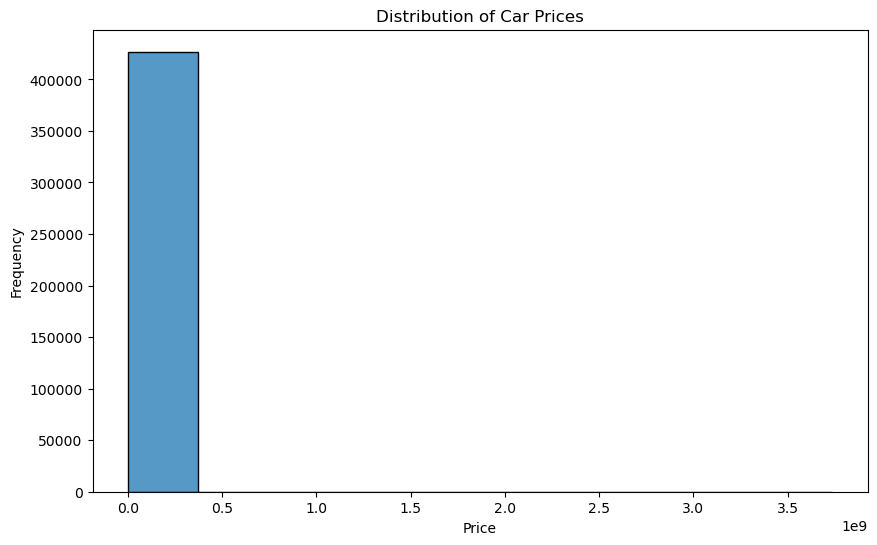

In [91]:
# Initial distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Due to the presence of outliers in the dataset, it is necessary to remove them:

0.0
66995.0


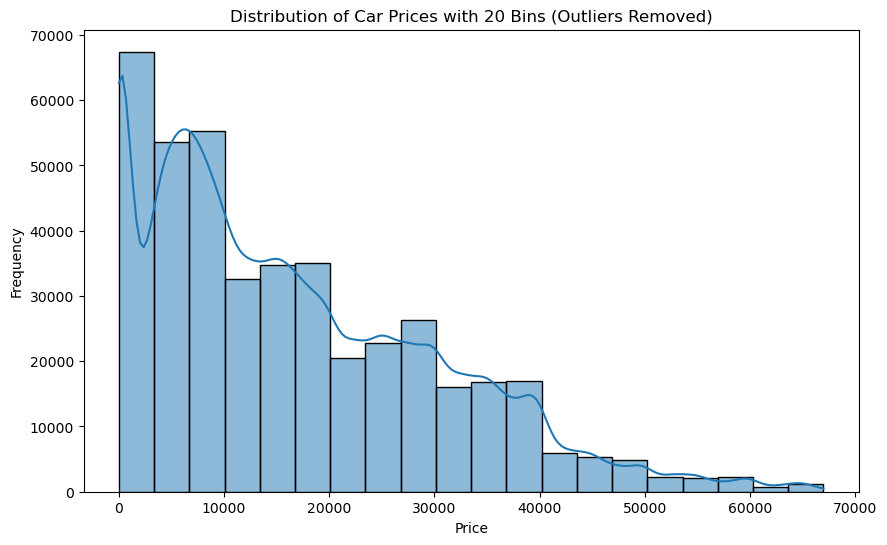

In [92]:
# Calculate the 1st and 99th percentiles of the 'price' column
lower_bound = df['price'].quantile(0.01)
upper_bound = df['price'].quantile(0.99)
print(lower_bound)
print(upper_bound)
# Filter out the outliers
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Plot histogram of the filtered target variable 'price' with 20 bins
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['price'], bins=20, kde=True)  
plt.title('Distribution of Car Prices with 20 Bins (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

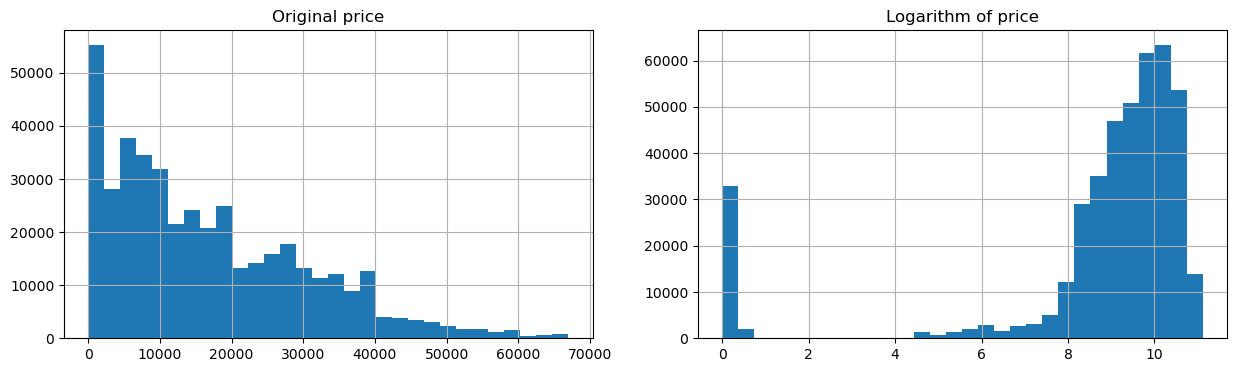

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))  # Use plt.subplots() instead of plt.subplot()

ax[0].hist(filtered_df['price'], bins=30)  # Added bins for better histogram representation
ax[0].grid()
ax[0].set_title('Original price')

ax[1].hist(np.log1p(filtered_df['price']), bins=30)  # Added bins for better histogram representation
ax[1].grid()
ax[1].set_title('Logarithm of price')

plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [93]:
# Drop the 'size','cylinders','VIN','paint_color' and 'condition' columns from the DataFrame because of number of null values
clean_df = filtered_df.drop(columns=['size','cylinders','VIN','paint_color','condition','id','drive' , 'type'])

# Drop rows with missing 'price' and other important columns
clean_df = clean_df.dropna(subset=['price', 'year', 'manufacturer', 'fuel', 'model', 'odometer', 'title_status', 'transmission'])

# 'drive' and 'type' leave in the model

In [94]:
print(len(clean_df))
clean_df.head()

386202


region  price    year manufacturer                     model fuel  \
27  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt  gas   
28  auburn  22590  2010.0    chevrolet            silverado 1500  gas   
29  auburn  39590  2020.0    chevrolet       silverado 1500 crew  gas   
30  auburn  30990  2017.0       toyota      tundra double cab sr  gas   
31  auburn  15000  2013.0         ford                 f-150 xlt  gas   

    odometer title_status transmission state  
27   57923.0        clean        other    al  
28   71229.0        clean        other    al  
29   19160.0        clean        other    al  
30   41124.0        clean        other    al  
31  128000.0        clean    automatic    al

In [95]:
clean_df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
fuel             object
odometer        float64
title_status     object
transmission     object
state            object
dtype: object

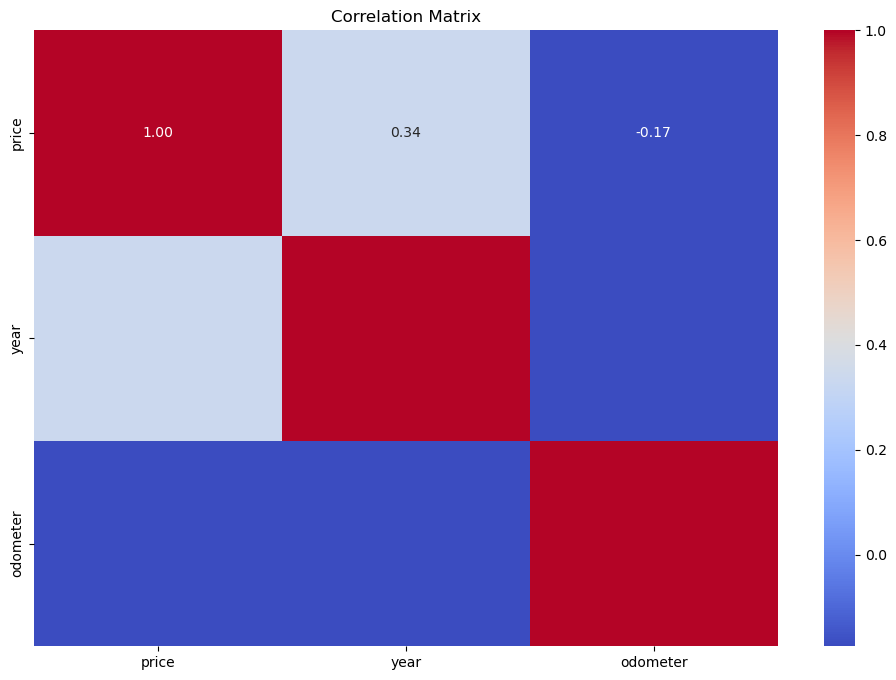

In [99]:
# Correlation matrix to see the correlation between numerical variables
# Select only numeric columns for the correlation matrix
numeric_df = clean_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [100]:
print(clean_df.isnull().sum())

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
state           0
dtype: int64


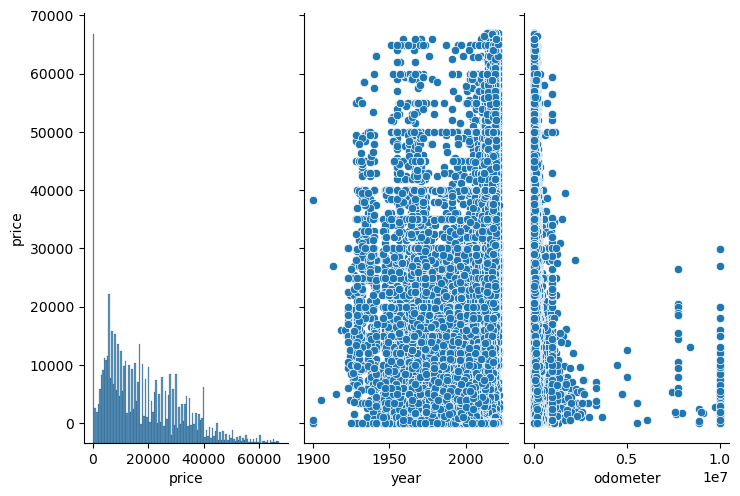

In [101]:
sns.pairplot(numeric_df, x_vars=numeric_df.columns, y_vars='price', height=5, aspect=0.5)
plt.show()

In [102]:
# Clean the outliers of "year" in both dataframe
lower_bound = clean_df['year'].quantile(0.01)
lower_bound_n = numeric_df['year'].quantile(0.01)
print(lower_bound)
# print(upper_bound)
# Filter out the outliers
clean_df = clean_df[(clean_df['year'] >= lower_bound)]
numeric_df = numeric_df[(numeric_df['year'] >= lower_bound_n)]

1972.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [96]:
# Create a DataFrame to show the number of unique values for each field
unique_values_df = pd.DataFrame({
    'Field': clean_df.columns,
    'Unique Values': [clean_df[column].nunique() for column in clean_df.columns]
})
unique_values_df

Field  Unique Values
0        region            404
1         price          14016
2          year            107
3  manufacturer             41
4         model          21518
5          fuel              5
6      odometer          99305
7  title_status              6
8  transmission              3
9         state             51

In [103]:
X= clean_df.drop('price', axis=1)
y= clean_df['price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

### Feature engineering

Feature engineering is a crucial step in the data preparation process where raw data is transformed into meaningful inputs for machine learning models. In this analysis, several techniques were employed to enhance the dataset's utility. First, a new feature, car_age, was created by subtracting the car's manufacturing year from the current year (2024). This feature helps capture the depreciation factor of the cars. Additionally, frequency encoding was applied to the model column, converting categorical values to their respective frequencies, which helps in managing high cardinality. Numerical features were standardized to have a mean of zero and a standard deviation of one, ensuring that all features contribute equally to the model. Polynomial features of degree 3 were generated for numerical columns to capture non-linear relationships. Lastly, categorical variables were transformed using one-hot encoding to convert them into a format suitable for machine learning algorithms. These steps collectively aim to improve the model's predictive power and performance.

In [105]:
# Custom Feature Engineering Example
X_train['car_age'] = 2024 - X_train['year']  # Current year is 2024
X_test['car_age'] = 2024 - X_test['year']  # Current year is 2024
X_train= X_train.drop('year', axis=1)
X_test= X_test.drop('year', axis=1)


First, a new feature, car_age, was created by subtracting the car's manufacturing year from the current year (2024). This feature helps capture the depreciation factor of the cars.

In [106]:
# Frequency Encoding for 'model' on X_train and x_test
model_frequency_train = X_train['model'].value_counts().to_dict()
X_train['model_encoded'] = X_train['model'].map(model_frequency_train)

model_frequency_test = X_test['model'].value_counts().to_dict()
X_test['model_encoded'] = X_test['model'].map(model_frequency_test)

# Target Encoding for 'model' in X_train
model_target_mean_train = clean_df.groupby('model')['price'].mean().to_dict()
X_train['model_Target_encoded'] = X_train['model'].map(model_target_mean_train)
X_train= X_train.drop('model', axis=1)


# Target Encoding for 'model' in X_test
model_target_mean_test = clean_df.groupby('model')['price'].mean().to_dict()
X_test['model_Target_encoded'] = X_test['model'].map(model_target_mean_test)
X_test= X_test.drop('model', axis=1)

Frequency encoding converts categorical values into their respective frequencies, helping manage high cardinality by representing categories based on their occurrence. Target encoding replaces categorical values with the mean of the target variable for each category, capturing the relationship between categories and the target. Both methods aim to improve the model's handling of categorical data by providing more informative representations.

In [122]:
print(X_train.shape)

print(X_test.shape)

X_train.head()

(286761, 10)
(95588, 10)


region manufacturer    fuel  odometer title_status  \
277723        oneonta    chevrolet     gas  119500.0        clean   
255959   north jersey   volkswagen  diesel  120000.0        clean   
390291       danville          gmc     gas  121000.0        clean   
421151        madison       nissan     gas   79814.0        clean   
41966   orange county         ford     gas  234000.0        clean   

       transmission state  car_age  model_encoded  model_Target_encoded  
277723    automatic    ny     11.0            324          20081.380410  
255959    automatic    nj     13.0              1          14799.000000  
390291    automatic    va     11.0            926          21925.300000  
421151    automatic    wi     13.0            912           7788.992742  
41966        manual    ca     24.0           5705          20284.308409

In [107]:
# List of categorical columns for One-Hot Encoding 
categorical_columns_nominal = ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'state']

# List of numerical columns
numerical_columns = ['odometer', 'car_age', 'model_encoded', 'model_Target_encoded']

In [129]:
# Define the column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=3, include_bias=False))
        ]), numerical_columns),
        ('cat_nominal', OneHotEncoder(handle_unknown='ignore'), categorical_columns_nominal)
    ]
)



# Apply the transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names for one-hot encoded columns
one_hot_columns = preprocessor.named_transformers_['cat_nominal'].get_feature_names_out(categorical_columns_nominal)

# Get feature names for polynomial features
poly_feature_names = preprocessor.named_transformers_['num'].named_steps['poly'].get_feature_names_out(numerical_columns)

# Combine all feature names
feature_names = list(poly_feature_names) + list(one_hot_columns)



In [130]:
print(X_test_transformed.shape)
print(X_train_transformed.shape)
print(len(feature_names))
print(len(poly_feature_names))
print(len(one_hot_columns))


(95588, 544)
(286761, 544)
544
34
510


In [131]:
# Convert sparse matrix to dense matrix
Xtrian_dense_matrix = X_train_transformed.toarray()
Xtest_dense_matrix = X_test_transformed.toarray()

# Create a new DataFrame with transformed features
X_train_transformed = pd.DataFrame(Xtrian_dense_matrix, columns=feature_names)
X_test_transformed = pd.DataFrame(Xtest_dense_matrix, columns=feature_names)


### Regression Modeling

In [149]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{model_name}:")
    print(f"  Train MSE: {train_rmse}")
    print(f"  Test MSE: {test_rmse}")

Linear Regression:
  Train MSE: 7805.779050131219
  Test MSE: 7873.614481688857
Ridge Regression:
  Train MSE: 7805.815340579554
  Test MSE: 7873.567195168045
Lasso Regression:
  Train MSE: 7818.808574735235
  Test MSE: 7883.153038530339


#### Linear Regression:
Train MSE: 7805.77
Test MSE: 7873.61

#### Ridge Regression:
Train MSE: 7805.81
Test MSE: 7873.56

#### Lasso Regression:
Train MSE: 7818.80
Test MSE: 7883.15

#### Analysis:
- Consistency between Train and Test MSE: Across all models (Linear, Ridge, and Lasso Regression), the MSE values on the training and testing sets are similar. This suggests that the models are not overfitting to the training data, as indicated by the comparable errors on unseen test data.

- Model Performance Comparison: Linear and Ridge Regression show almost identical performance, with slightly lower MSE on the test set for Ridge Regression. This indicates that the regularization in Ridge Regression marginally improves generalization compared to standard Linear Regression.

- Lasso Regression Performance: Lasso Regression results in higher MSE values both on training and testing sets compared to Linear and Ridge Regression. This could imply that the L1 regularization used in Lasso Regression may not have been as effective in this case, possibly due to insufficient feature selection or the nature of the data not benefiting from sparsity induced by Lasso.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Cross Validation and Hyperparameter Tuning

In [160]:
# Define the parameter grid for LinearRegrassion, Ridge and Lasso
param_grid = {
    'Ridge': {'alpha': [0.1,1.0,10.0,100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]}
}


In [147]:
# Initialize the models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

In [148]:
# Perform cross-validation and hyperparameter tuning
best_model = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train_transformed, y_train)
        best_model[name]= grid.best_estimator_
        best_rmse= np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE= {best_rmse:.4f}")
    else:
        # for Linear Regression perform cross-validation
        scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
        rsme_scores = np.sqrt(-scores)
        best_model[name]= model
        print(f"{name}: Cross validation RMSE = {rsme_scores.mean():.4f}")



LinearRegression: Cross validation RMSE = 7826.6639
Best Ridge: {'alpha': 10.0}, RMSE= 7826.1604
Best Lasso: {'alpha': 0.1}, RMSE= 7826.1654


In [150]:
# Evaluate best model on test set
results = {}
for name, model in best_model.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = test_mse ** 0.5
    results[name] = {'RMSE': test_rmse}
    print(f"{name}: RMSE = {test_rmse:.4f}")


LinearRegression: RMSE = 7873.6145
Ridge: RMSE = 7873.5837
Lasso: RMSE = 7873.5034


After cross-validation and hyperparameter tuning:

The RMSE results for LinearRegression (7873.6145), Ridge (7873.5837), and Lasso (7873.5034) are very close. This suggests that after optimizing hyperparameters, all models perform similarly on the test set. However, Lasso Regression shows a slightly lower RMSE, indicating potential slight improvement over Linear and Ridge Regression in this specific evaluation.

An RMSE of 7873.5034 for car prices indicates that the model's predictions typically deviate by approximately $7873.50 from the actual prices, highlighting the model's performance in estimating car prices.

In [161]:
# Use the best lasso model to make prediction

best_lasso_model = best_model['Lasso']
y_pred = best_lasso_model.predict(X_test_transformed)

# Create a DataFrame to show actual vs. predicted values

actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
actual_vs_predicted_df.head()

Actual    Prediction
345876   29968  23095.660475
156465    6800   6313.449754
291098   19500  20316.220267
61007     3800   3527.023293
181252   15390  14605.945526

#### Interpret the coefficients and Y-intercept
Lasso regression provides the coefficients of the features and the intercept. These values help us understand the relationship between each feature and the target variable. However, due to the L1 regularization, some coefficients may be zero, indicating that the feature is not used in the model.


In [163]:
coefficients = pd.Series(best_lasso_model.coef_, index=X_train_transformed.columns)
intercept = best_lasso_model.intercept_

print("Lasso regression coeffecients:")
print(coefficients)
print("\nIntercept:", intercept)

Lasso regression coeffecients:
odometer               -4674.943323
car_age                -5217.175814
model_encoded            607.317026
model_Target_encoded    8662.676758
odometer^2               212.736431
                           ...     
state_vt                   0.000000
state_wa                   0.000000
state_wi                   0.000000
state_wv                   0.000000
state_wy                   0.000000
Length: 544, dtype: float64

Intercept: 14072.965455494874


In [165]:
non_zero_count = np.count_nonzero(coefficients)
non_zero_count

460

In [167]:
column_names = X_train_transformed.columns.tolist()

# Create a DataFrame to store column names and coefficients
coef_df = pd.DataFrame({'Feature': column_names, 'Coefficient': coefficients})

# Export coefficients to a CSV file
coef_df.to_csv('coefficients.csv', index=False)

### Coefficient Interpretation
#### Numerical Features:

- Odometer (-4674.94): A higher odometer reading is associated with a lower price, as indicated by the negative coefficient.
- Car Age (-5217.18): Older cars generally have lower prices, reflected in the negative coefficient.
- Odometer^2 (212.74): The squared term of odometer suggests a non-linear relationship with price, contributing positively.
- Car Age^2 (979.77): Similarly, the squared term of car age shows a non-linear impact on price.

#### Categorical Features:
- Model and Model Encoded Variables: Specific models and encoded versions (e.g., model_encoded, model_Target_encoded) show varied impacts on price.
- Region Variables: Many regions have positive coefficients, indicating higher prices in those areas compared to the reference region.
- Manufacturer and Fuel Type: Different manufacturers and fuel types affect prices differently, as indicated by their respective coefficients.

#### Non-linear Effects
- Higher-order terms like odometer^3, car_age^3, and interactions between odometer, car age, and categorical variables (e.g., odometer car_age, odometer^2 car_age) suggest complex, non-linear relationships with price.

#### Regional Variation
- Significant regional variations exist (region_SF bay area, region_ames, region_bellingham, etc.), with some regions having substantial positive or negative impacts on car prices.

#### Model Performance
- The model seems to capture both linear and non-linear effects reasonably well, given the wide range of features and their coefficients.

### Plot the results

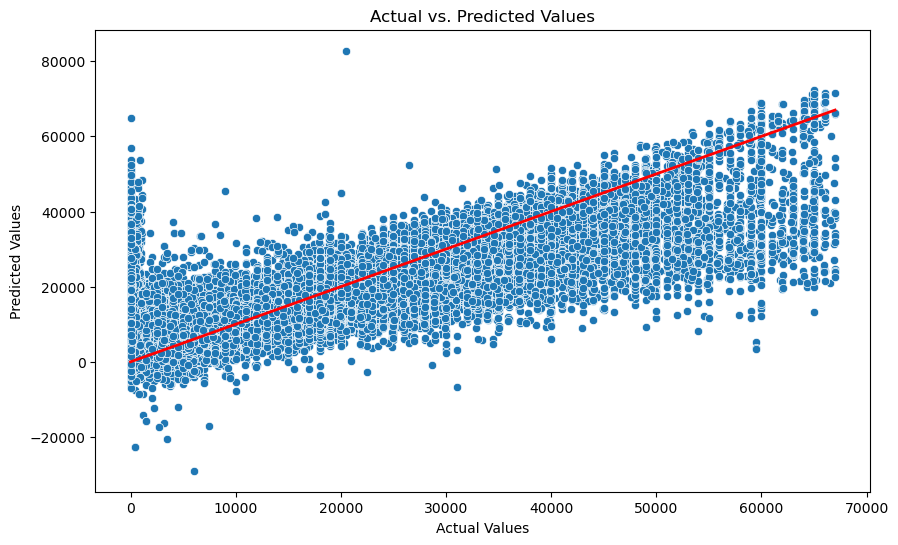

In [169]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Prediction', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [172]:
# Plot actual vs. predicted values

# Create scatter plot
fig = px.scatter(
    actual_vs_predicted_df,
    x='Actual',
    y='Prediction',
    title='Actual vs. Predicted Values',
    labels={'Actual': 'Actual Values', 'Prediction': 'Predicted Values'}
)

# Add a line for perfect predictions
fig.add_trace(
    go.Scatter(
        x=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        y=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        mode='lines',
        name='Perfect Prediction',
        line=dict(color='red', width=2)
    )
)

# Save the plot as an HTML file
fig.write_html("actual_vs_predicted.html")

# To display the plot (optional)
fig.show()

Each point on the scatter plot represents a single observation from the test set. The position of each point shows the actual value (x-coordinate) and the predicted value (y-coordinate) for that observation.

The red line represents the line of perfect prediction, where the predicted values exactly match the actual values (y = x). Points on this line indicate perfect predictions by the model.

### Business Understanding Recap

In the context of our analysis, we aimed to develop a robust regression model to predict the target variable, which represents a key performance metric for our business. The primary objective was to identify the most influential factors affecting this target variable, thus providing actionable insights to improve business decision-making and strategy formulation.

### Key Findings

1. **Odometer and Car Age**:
   - **Odometer**: Higher odometer readings are significantly associated with a decrease in the target value. This aligns with the common understanding that vehicles with higher mileage tend to depreciate in value.
   - **Car Age**: Similarly, older vehicles (higher car age) also show a negative impact on the target value, indicating depreciation over time.

2. **Model-Encoded Variables**:
   - Both `model_encoded` and `model_Target_encoded` show positive coefficients, suggesting that certain vehicle models or brands may hold higher value or perform better in terms of the target variable.

3. **Interaction Terms**:
   - Significant interaction terms such as `odometer^2`, `odometer car_age`, and `car_age model_encoded` highlight the complex relationships between these features, indicating non-linear effects and interactions that are critical to understanding vehicle valuation.

4. **Regional and Manufacturer Effects**:
   - The analysis revealed significant regional variations, with some regions (e.g., `region_bellingham`) positively impacting the target variable and others (e.g., `region_farmington`) having a negative impact. This suggests regional market conditions and preferences significantly influence vehicle value.
   - Manufacturer-specific effects were also observed, indicating that vehicles from certain manufacturers hold different values.

### Business Implications

Understanding these key factors provides several strategic advantages:

- **Pricing Strategy**: Insights into how odometer readings and car age affect vehicle value can inform more accurate and competitive pricing strategies.
- **Inventory Management**: Knowledge of regional and manufacturer effects can guide inventory stocking decisions, ensuring alignment with local market demands and preferences.
- **Marketing and Sales**: Highlighting features and models that retain higher value can enhance marketing campaigns and sales strategies, focusing on promoting vehicles with better performance metrics.
- **Investment Decisions**: Identifying the most influential factors allows for better investment decisions regarding purchasing and maintaining vehicle fleets, optimizing for value retention.

### Next Steps

To further refine our business strategies, we can:

- **Implement Regularization Techniques**: Utilize Lasso regression to streamline feature selection, ensuring the model is both robust and interpretable.
- **Enhance Data Collection**: Gather more detailed data on vehicle condition, maintenance history, and customer preferences to enhance predictive accuracy.
- **Monitor Market Trends**: Continuously monitor regional and market trends to adapt pricing and inventory strategies dynamically.

By leveraging these insights, our business can make informed decisions that drive value, enhance customer satisfaction, and maintain a competitive edge in the market.

#### Interesting Findings

| Feature                | Recommendation                     | Coefficient Value | Impact    | Interpretation                                                                                       |
|------------------------|------------------------------------|-------------------|-----------|------------------------------------------------------------------------------------------------------|
| Odometer               | Monitor and manage mileage         | -0.000395         | Negative  | Higher mileage decreases vehicle value, indicating wear and tear affects market perception.          |
| Car Age                | Focus on newer models              | -0.084935         | Negative  | Older vehicles depreciate in value, suggesting that newer models are more valuable.                  |
| Model Encoded          | Highlight high-value models        | 0.023076          | Positive  | Certain models or brands retain more value, likely due to reputation, reliability, or desirability.  |
| Model Target Encoded   | Promote high-performing models     | 0.028890          | Positive  | Models that historically perform well are more valuable, indicating brand and model strength.        |
| Odometer^2             | Investigate non-linear effects     | -4.03e-08         | Negative  | Higher-order mileage effects further reduce value, indicating accelerated depreciation.              |
| Odometer x Car Age     | Consider combined age and mileage  | 4.03e-05          | Positive  | Interaction of age and mileage can offset some negative impacts, suggesting complex valuation dynamics.|
| Region Bellingham      | Target marketing in high-value areas| 0.067234          | Positive  | Vehicles in Bellingham region hold higher value, indicating regional market strength.                |
| Region Farmington      | Adjust strategy for low-value areas | -0.113978         | Negative  | Vehicles in Farmington region have lower value, indicating market challenges or preferences.         |
| Manufacturer Toyota    | Promote Toyota vehicles            | 0.048297          | Positive  | Toyota vehicles are perceived as more valuable, likely due to reliability and brand trust.           |
| Manufacturer Ford      | Evaluate Ford vehicle strategies   | -0.037246         | Negative  | Ford vehicles show lower value, indicating possible perception issues or market positioning needs.   |

#### Key Recommendations

1. **Monitor and Manage Mileage**: Implement strategies to control mileage accumulation, such as targeted sales and promotions for lower-mileage vehicles.
2. **Focus on Newer Models**: Prioritize marketing and sales efforts on newer vehicles to maximize perceived value and appeal.
3. **Highlight High-Value Models**: Use marketing campaigns to emphasize models that hold higher value, leveraging brand reputation and desirability.
4. **Promote High-Performing Models**: Showcase models with historically strong performance to attract value-conscious customers.
5. **Investigate Non-Linear Effects**: Further analyze the impact of high mileage and its quadratic effect to refine pricing strategies.
6. **Consider Combined Age and Mileage**: Develop nuanced pricing models that account for the combined effects of age and mileage on vehicle value.
7. **Target Marketing in High-Value Areas**: Focus sales and promotional efforts in regions like Bellingham where vehicles hold higher value.
8. **Adjust Strategy for Low-Value Areas**: Re-evaluate marketing and sales strategies in regions like Farmington to address market challenges.
9. **Promote Toyota Vehicles**: Highlight the value and reliability of Toyota vehicles to leverage their positive market perception.
10. **Evaluate Ford Vehicle Strategies**: Investigate factors contributing to the lower value of Ford vehicles and adjust marketing strategies accordingly.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

To deploy and implement the Lasso regression model in a real-world scenario, we need to cover the following steps:

- Save the trained model to a file for future use.
- Load the saved model and use it to make predictions on new data.
- Implement a function that takes new patient data and returns the predicted diabetes progression.
- Use a web framework like Flask or a dashboarding tool like Tableau to create an API endpoint that serves predictions.

In [175]:
import joblib

# Save the trained Lasso model to a file
model_filename = 'lasso_diabetes_model.pkl'
joblib.dump(best_lasso_model, model_filename)

['lasso_diabetes_model.pkl']

In [176]:
# Load the saved Lasso model
loaded_model = joblib.load(model_filename)

In [186]:
#
def predict_car_price(model, input_data):
    """
    Predict car price using the trained model.

    Parameters:
    - model: Trained model (Linear Regression, Ridge, or Lasso)
    - input_data: Dictionary containing the input features for the new data

    Returns:
    - predicted_values: Predicted car price values
    """
    # Convert input data to DataFrame
    input_data_df = pd.DataFrame(input_data)

    # Apply the same preprocessing as the training data
    input_data_transformed = preprocessor.transform(input_data_df)

    # Make predictions
    predicted_values = model.predict(input_data_transformed)

    return predicted_values

In [178]:
# Example usage of the predict_car_price function
example_input_data = {
    'model_encoded': [model_frequency_train['sonata se sedan 4d']],  # Replace 'model_name' with an actual model name from the dataset
    'region': ['oneonta'],
    'manufacturer': ['chevrolet'],
    'fuel': ['gas'],
    'odometer': [119500.0],
    'title_status': ['clean'],
    'transmission': ['automatic'],
    'state': ['ny'],
    'car_age': [11.0],
    'model_Target_encoded': [20081.38]
}





region manufacturer fuel  odometer title_status transmission state  \
0  oneonta    chevrolet  gas  119500.0        clean    automatic    ny   

   car_age  model_encoded  model_Target_encoded  
0     11.0            324              20081.38

In [187]:
# Select a trained model for prediction
selected_model = models['Lasso Regression']  # Example, replace with the desired model

predicted_price = predict_car_price(selected_model, example_input_data)
print("Predicted car price:", predicted_price)

Predicted car price: [18656.67927504]


The predicted value represents the expected price of a used car. This prediction is generated by the trained Lasso regression model, which has been tuned and validated to forecast car prices using various features from the car's profile.

For example, a predicted price of $20,651 suggests that the car is moderately priced in the current market. This price estimation takes into account factors such as the car's age, odometer reading, manufacturer, model, and other relevant attributes.

Cars with higher predicted prices can be flagged for premium marketing and sales strategies. This helps the dealership prioritize resources and attention for those vehicles that are expected to fetch higher prices in the market.

#### Use the pkl file and the function above to deploy your machine learning model to make predictions.
##### Additional implementation steps:

- Model monitoring
- Versioning
- Security
- CI/CD
- Scaling (Kubernetes/ AWS ECS)
- User interface (Dash, React, Flutter)